In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sisl

In [ ]:
# Carbon-carbon bond length in Angstrom
a_cc = 1.42

# Lattice vectors for a 2D graphene unit cell
a1 = [3 / 2 * a_cc, np.sqrt(3) / 2 * a_cc, 0.0]
a2 = [3 / 2 * a_cc, -np.sqrt(3) / 2 * a_cc, 0.0]
a3 = [0.0, 0.0, 20.0]  # vacuum in z

lattice = sisl.Lattice([a1, a2, a3], nsc=[3, 3, 1])

# Atomic positions
pos = [
    [0.0, 0.0, 0.0],
    [1.42, 0, 0.0],
    [0.0, 0.0, 0.0],
]

atoms = [
    sisl.Atom(6),  # Carbon
    sisl.Atom(6),  # Carbon
    sisl.Atom(1),
]

# Build geometry
geom = sisl.Geometry(pos, atoms, lattice=lattice)

In [ ]:
n_k = 20

t = 1.0

V_list = np.linspace(0.01, 5.0, num=5)
V_list = [1.0]
results_list = []

for V in V_list:
    hamiltonian = sisl.Hamiltonian(geom)
    for ia in geom:
        if ia != hamiltonian.no - 1:
            idx_a = hamiltonian.close(ia, R=[0.1, 1.44])
            hamiltonian[ia, idx_a[0]] = 0.0
            hamiltonian[ia, idx_a[1]] = t
    hamiltonian.H[0, 2] = V
    hamiltonian.H[2, 0] = V
    hamiltonian.finalize()
    hamiltonian.write("dec-graphene.HSX")
    """
    k_grid_obj = sisl.MonkhorstPack(hamiltonian.geometry, [n_k, n_k, 1])  # 2D grid
    delta_vs_temp, critical_temp_list, fit_fig = routines.search_crit_temp(
        hamiltonian=hamiltonian,
        kgrid=k_grid_obj,
        hubbard_int_orbital_basis=[1.0, 1.0, 1.0],
        epsilon=1e-3,
        max_iter=1000,
        n_temp_points=30,
    )
    results_list.append(
        {
            "V": V,
            "T_C_0": critical_temp_list[0],
            "T_C_1": critical_temp_list[1],
            "T_C_2": critical_temp_list[2],
        }
    )
    """

warn:0: SislWarning: added 1 diagonal elements. This changes the sparsity pattern.


Text(0, 0.5, 'T_C')

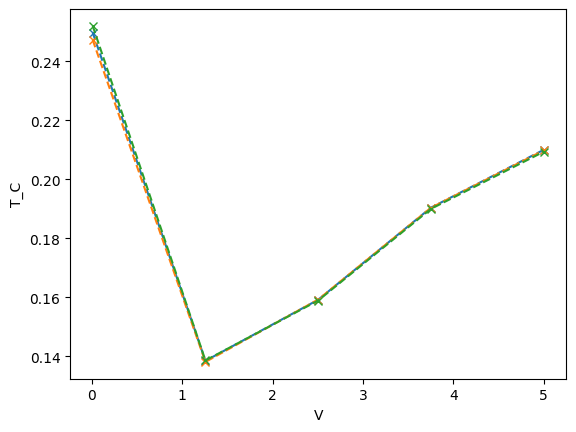

In [ ]:
results = pd.DataFrame(results_list).sort_values(by="V").reset_index(drop=True)

plt.plot(results["V"], results["T_C_0"], "--x")
plt.plot(results["V"], results["T_C_1"], "--x")
plt.plot(results["V"], results["T_C_2"], "--x")
plt.xlabel("V")
plt.ylabel("T_C")